# Time to Ruin Calculation in a Decentralized Marketplace

## Failure Rate Calculation

1. **Individual Failure Rate ( $F_u$ )**:
   - Each user u has their own failure rate  $F_u$. This rate follows a long-tailed distribution where most users have low failure rates, and a few have higher rates due to malicious intent or frequent mistakes.

2. **Overall Task Failure Rate ( F )**:
   - The failure rate for a task depends on the failure rates of all four actors involved (requester, dApp provider, data provider, and computing provider).
   - The formula for calculating the failure rate of a task considering the failure rates of all participants can be given by:
     $$
     F = 1 - (1 - F_u) \cdot (1 - \text{mean}(F_u))^3
     $$
   - This formula considers the probability that at least one of the four actors fails, causing the task to fail.

## Time to Ruin Calculation

Given:
- $S_0$ = 1000 units (initial stake)
- P = 100 (penalty per task failure)
- L (loss per task)
- F (failure rate for tasks)

We want to calculate the expected time to ruin (number of tasks until a participant’s stake is depleted).

### Expected Loss Per Task

For a given participant with failure rate  $F_u$ :
$$
L = F \times P
$$

### Time to Ruin

The time to ruin,  T , is given by:
$$
T = \frac{S_0}{L} = \frac{S_0}{F \times P}
$$

## Incorporating the Failure Rate Formula

To apply this to a participant:

1. **Determine  $F_u$**:
   - Given the long-tailed distribution, determine the specific  F_u  for the participant.

2. **Calculate the Overall Task Failure Rate  F**:
   - Using the provided formula:
     $$
     F = 1 - (1 - F_u) \cdot (1 - \text{mean}(F_u))^3
     $$

### Example Calculation

Suppose we have the average failure rate among all participants as follow:
$$
\text{mean}(F_u) = 0.05
$$  

For a participant with  $F_u$ = 0.1 :

$$
F = 1 - (1 - 0.1) \cdot (1 - 0.05)^3
$$

Calculating $(1 - 0.05)^3$ :
$$
(1 - 0.05)^3 = 0.95^3 \approx 0.857
$$

Now, substituting back:
$$
F = 1 - 0.9 \cdot 0.857 = 1 - 0.7713 = 0.2287
$$

Thus, the task failure rate  F  for this participant is approximately 0.2287.

Now, calculate the time to ruin  T :
$$
T = \frac{1000}{0.2287 \times 100} = \frac{1000}{22.87} \approx 43.718 \text{ tasks}
$$

## Summary

To summarize, the key steps are:

1. Determine the individual failure rate  $F_u$  for each participant.
2. Compute the overall task failure rate  F  using:
   $$
   F = 1 - (1 - F_u) \cdot (1 - \text{mean}(F_u))^3
   $$
3. Calculate the time to ruin  T  for a participant:
   $$
   T = \frac{S_0}{F \times P}
   $$

Let's try to plot that for a mean failure rate of 5%.  

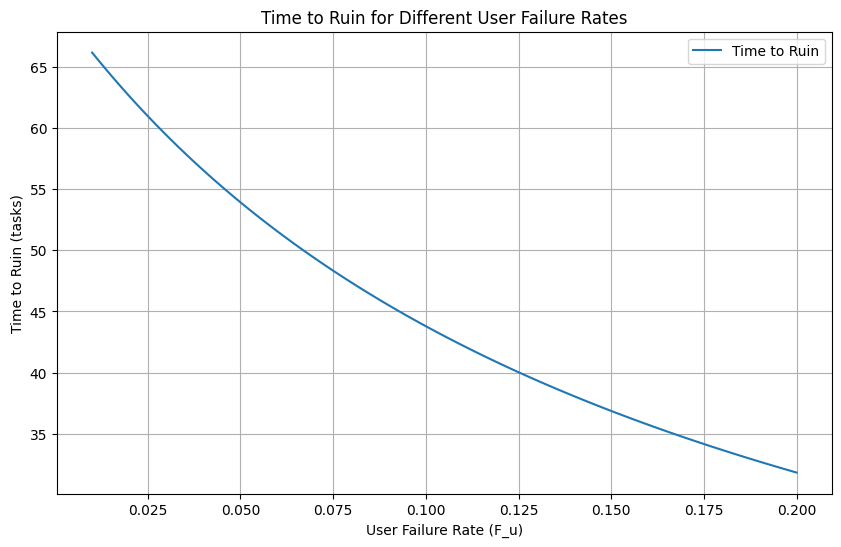

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the overall task failure rate
def calculate_failure_rate(F_u, mean_F_u):
    return 1 - (1 - F_u) * (1 - mean_F_u) ** 3

# Function to calculate the time to ruin
def time_to_ruin(S_0, F, P):
    return S_0 / (F * P)

# Parameters
S_0 = 1000  # initial stake
P = 100     # penalty per task failure
mean_F_u = 0.05  # average failure rate among all participants

# Generate different failure rates (F_u) for users
F_u_values = np.linspace(0.01, 0.2, 100)  # user failure rates ranging from 0.01 to 0.2

# Calculate overall task failure rate and time to ruin for each user failure rate
F_values = calculate_failure_rate(F_u_values, mean_F_u)
T_values = time_to_ruin(S_0, F_values, P)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(F_u_values, T_values, label='Time to Ruin')
plt.xlabel('User Failure Rate (F_u)')
plt.ylabel('Time to Ruin (tasks)')
plt.title('Time to Ruin for Different User Failure Rates')
plt.legend()
plt.grid(True)
plt.show()

## Generating a Long-Tailed Distribution

### Why Use a Long-Tailed Distribution?
- A long-tailed distribution, such as the Pareto distribution, is used to model data where most observations are concentrated near the lower end of the distribution, but there are a few observations with much higher values.
- In the context of user failure rates, most users are expected to have low failure rates due to honest behavior and occasional mistakes. However, a few users might have significantly higher failure rates due to malicious behavior or frequent errors.

### Generating the Distribution
- We use the Pareto distribution to generate a realistic set of user failure rates F_u.
- The shape parameter alpha of the Pareto distribution determines the heaviness of the tail. A smaller shape parameter results in a heavier tail.
- The scale parameter (x_min) shifts the distribution.

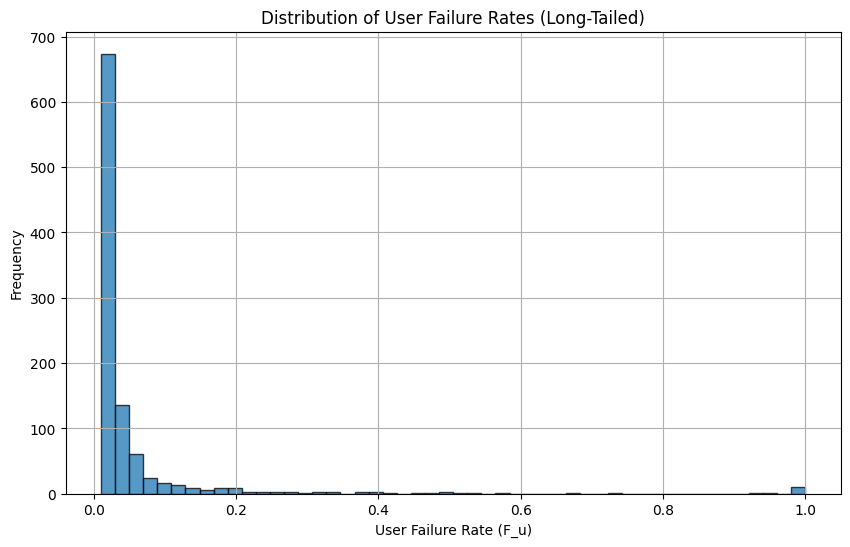

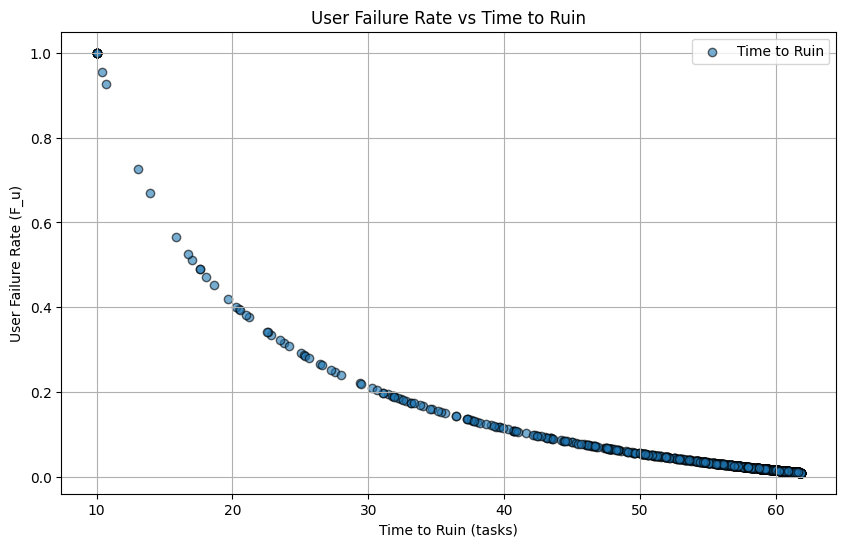

In [2]:
# Function to calculate the overall task failure rate
def calculate_failure_rate(F_u, mean_F_u):
    return 1 - (1 - F_u) * (1 - mean_F_u) ** 3

# Function to calculate the time to ruin
def time_to_ruin(S_0, F, P):
    return S_0 / (F * P)

# Parameters
S_0 = 1000  # initial stake
P = 100     # penalty per task failure

# Generate a long-tailed distribution for user failure rates (F_u)
shape, scale = 1.0, 0.01  # shape (alpha) and scale (xmin) parameters for the Pareto distribution
F_u_values = (np.random.pareto(shape, 1000) + 1) * scale

# Ensure that failure rates are within a realistic range [0, 1]
F_u_values = np.clip(F_u_values, 0, 1)

# Calculate the mean failure rate from the generated distribution
mean_F_u = np.mean(F_u_values)

# Calculate overall task failure rate and time to ruin for each user failure rate
F_values = calculate_failure_rate(F_u_values, mean_F_u)
T_values = time_to_ruin(S_0, F_values, P)

# Plot the distribution of user failure rates
plt.figure(figsize=(10, 6))
plt.hist(F_u_values, bins=50, alpha=0.75, edgecolor='black')
plt.xlabel('User Failure Rate (F_u)')
plt.ylabel('Frequency')
plt.title('Distribution of User Failure Rates (Long-Tailed)')
plt.grid(True)
plt.show()

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(T_values, F_u_values, alpha=0.6, edgecolor='black', label='Time to Ruin')
plt.xlabel('Time to Ruin (tasks)')
plt.ylabel('User Failure Rate (F_u)')
plt.title('User Failure Rate vs Time to Ruin')
plt.legend()
plt.grid(True)
plt.show()

### Box Plot of User Failure Rates

The box plot below highlights the distribution of user failure rates and clearly shows the presence of outliers with exceptionally high failure rates.

From the box plot, we observe that:
- The majority of users have low failure rates clustered around the lower end of the scale.
- There are a few outliers with much higher failure rates which we might want to deal with in our marketplace.

### Time to Ruin Analysis

The scatter plot of user failure rates against the time to ruin demonstrates that users with higher failure rates are ruined significantly faster than those with lower rates. These high-failure-rate users (outliers) deplete their initial stakes much quicker due to frequent task failures.

### Implications and Considerations

Identifying outliers in the distribution of user failure rates is crucial for optimizing system settings:
- **Ruin Outliers Quickly**: Adjusting penalties and failure rate calculations can ensure that users with high failure rates are ruined faster, thus discouraging malicious behavior.
- **Protect Regular Users**: By fine-tuning the system, we can minimize the risk of ruining honest users with low failure rates, ensuring fair participation.

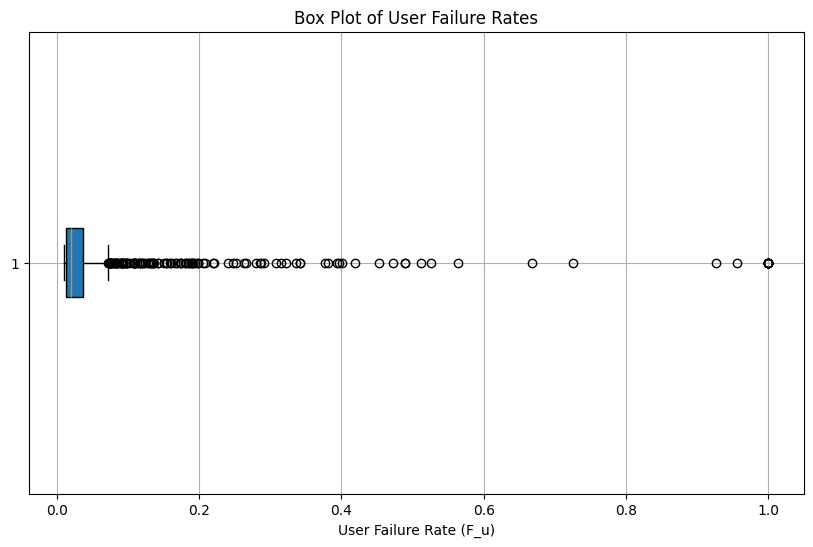

In [3]:
# Calculate overall task failure rate and time to ruin for each user failure rate
F_values = calculate_failure_rate(F_u_values, mean_F_u)
T_values = time_to_ruin(S_0, F_values, P)

# Box plot to show outliers in user failure rates
plt.figure(figsize=(10, 6))
plt.boxplot(F_u_values, vert=False, patch_artist=True)
plt.xlabel('User Failure Rate (F_u)')
plt.title('Box Plot of User Failure Rates')
plt.grid(True)
plt.show()